In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Column names
column_names = ['Algorithm', 'Distribution', 'Samples', 'Dimensions', 'Cores', 'Execution Time']

# Load the CSV file without headers and assign column names
df = pd.read_csv('results.csv', header=None, names=column_names)

# Execution Time vs Dimensions

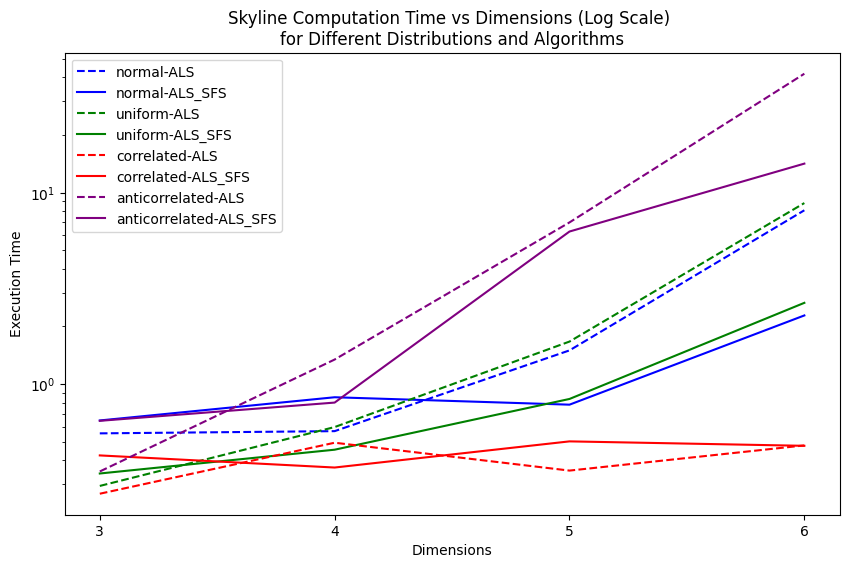

In [46]:
# Filter the DataFrame for a fixed number of samples and cores
fixed_cores = 16
fixed_samples = 1000000
filtered_df = df[(df['Cores'] == fixed_cores) & (df['Samples'] == fixed_samples)]

# Plotting
plt.figure(figsize=(10, 6))

# Define the colors for each distribution
colors = {'normal': 'blue', 'uniform': 'green', 'correlated': 'red', 'anticorrelated': 'purple'}

# Store distinct sample values for setting x-ticks
distinct_samples = sorted(filtered_df['Dimensions'].unique())

for distribution in filtered_df['Distribution'].unique():
    for algorithm in filtered_df['Algorithm'].unique():
        # Subset for each distribution and algorithm
        subset_df = filtered_df[(filtered_df['Distribution'] == distribution) & (filtered_df['Algorithm'] == algorithm)]

        # Plot
        if algorithm == 'ALS':
            linestyle = '--'  # Dashed line for ALS
        else:
            linestyle = '-'   # Solid line for ALS_SFS

        plt.plot(subset_df['Dimensions'], subset_df['Execution Time'], label=f'{distribution}-{algorithm}',
                 color=colors[distribution], linestyle=linestyle)

# Adding labels, title, and setting y-axis to log scale
plt.xlabel('Dimensions')
plt.ylabel('Execution Time')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xticks(distinct_samples)  # Set x-ticks to distinct sample values
plt.title('Skyline Computation Time vs Dimensions (Log Scale) \nfor Different Distributions and Algorithms')
plt.legend()

# Create 'plots' directory if it doesn't exist
output_directory = 'plots'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Save the plot to a file in the 'plots' directory with 600 DPI
plt.savefig(f'{output_directory}/Skyline_Time_vs_Dimensions.png', dpi=600)

plt.show()

# Execution Time vs Samples

C:\Users\mosch\AppData\Local\Temp\ipykernel_2104\1674114387.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:,'Samples'] = filtered_df['Samples'].astype('category')


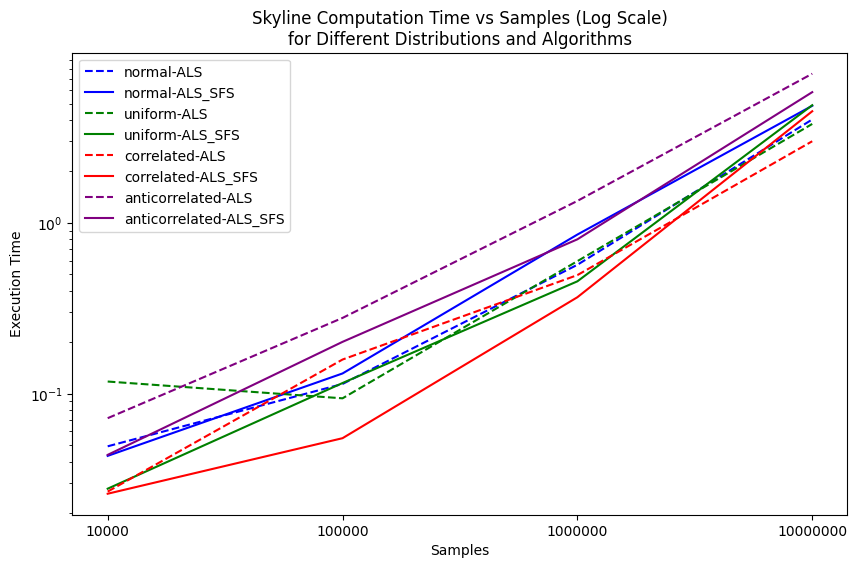

In [47]:
# Filter the DataFrame for a fixed dimension and cores
fixed_dimension = 4
fixed_cores = 16
filtered_df = df[(df['Cores'] == fixed_cores) & (df['Dimensions'] == fixed_dimension)]

# Convert 'Samples' to a categorical variable
filtered_df.loc[:,'Samples'] = filtered_df['Samples'].astype('category')

# Plotting
plt.figure(figsize=(10, 6))

# Define the colors for each distribution
colors = {'normal': 'blue', 'uniform': 'green', 'correlated': 'red', 'anticorrelated': 'purple'}

# Get the distinct categories for Samples
distinct_samples = filtered_df['Samples'].cat.categories

for distribution in filtered_df['Distribution'].unique():
    for algorithm in filtered_df['Algorithm'].unique():
        # Subset for each distribution and algorithm
        subset_df = filtered_df[(filtered_df['Distribution'] == distribution) & (filtered_df['Algorithm'] == algorithm)]

        # Plot
        if algorithm == 'ALS':
            linestyle = '--'  # Dashed line for ALS
        else:
            linestyle = '-'   # Solid line for ALS_SFS

        # Use the categorical codes for plotting
        plt.plot(subset_df['Samples'].cat.codes, subset_df['Execution Time'], label=f'{distribution}-{algorithm}',
                 color=colors[distribution], linestyle=linestyle)

# Adding labels, title with two lines, and setting y-axis to log scale
plt.xlabel('Samples')
plt.ylabel('Execution Time')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xticks(range(len(distinct_samples)), distinct_samples)  # Set x-ticks to distinct sample categories
plt.title('Skyline Computation Time vs Samples (Log Scale)\nfor Different Distributions and Algorithms')
plt.legend()

# Create 'plots' directory if it doesn't exist
output_directory = 'plots'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Save the plot to a file in the 'plots' directory with 600 DPI
plt.savefig(f'{output_directory}/Skyline_Time_vs_Samples.png', dpi=300)

plt.show()

# Execution Time vs Cores

C:\Users\mosch\AppData\Local\Temp\ipykernel_2104\3328764871.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cores'] = filtered_df['Cores'].astype('category')


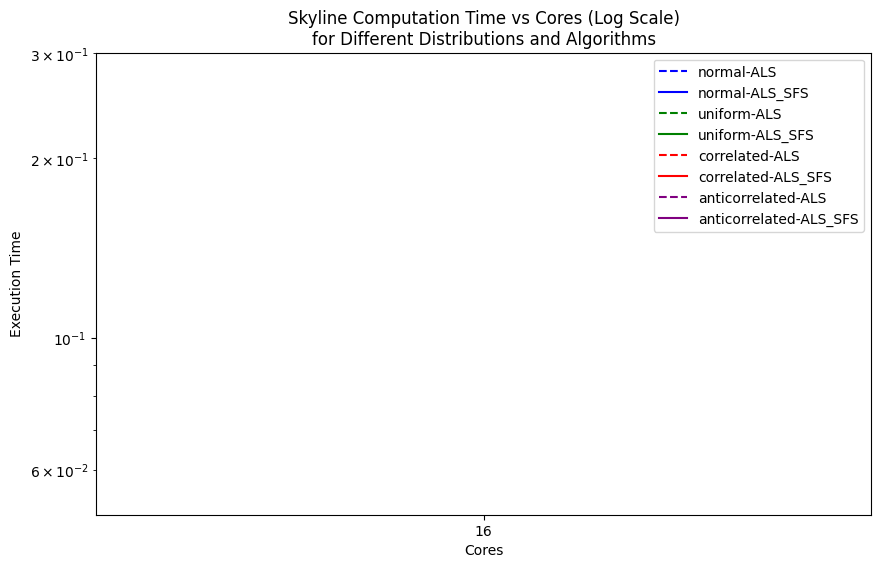

In [44]:
# Filter the DataFrame for a fixed dimension and sample size
fixed_dimension = 4
fixed_samples = 100000
filtered_df = df[(df['Dimensions'] == fixed_dimension) & (df['Samples'] == fixed_samples)]

# Convert 'Cores' to a categorical variable
filtered_df['Cores'] = filtered_df['Cores'].astype('category')

# Plotting
plt.figure(figsize=(10, 6))

# Define the colors for each distribution
colors = {'normal': 'blue', 'uniform': 'green', 'correlated': 'red', 'anticorrelated': 'purple'}

# Get the distinct categories for Cores
distinct_cores = filtered_df['Cores'].cat.categories

for distribution in filtered_df['Distribution'].unique():
    for algorithm in filtered_df['Algorithm'].unique():
        # Subset for each distribution and algorithm
        subset_df = filtered_df[(filtered_df['Distribution'] == distribution) & (filtered_df['Algorithm'] == algorithm)]

        # Plot
        if algorithm == 'ALS':
            linestyle = '--'  # Dashed line for ALS
        else:
            linestyle = '-'   # Solid line for ALS_SFS

        # Use the categorical codes for plotting
        plt.plot(subset_df['Cores'].cat.codes, subset_df['Execution Time'], label=f'{distribution}-{algorithm}',
                 color=colors[distribution], linestyle=linestyle)

# Adding labels, title with two lines, and setting y-axis to log scale
plt.xlabel('Cores')
plt.ylabel('Execution Time')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xticks(range(len(distinct_cores)), distinct_cores)  # Set x-ticks to distinct core categories
plt.title('Skyline Computation Time vs Cores (Log Scale)\nfor Different Distributions and Algorithms')
plt.legend()

# Create 'plots' directory if it doesn't exist
output_directory = 'plots'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Save the plot to a file in the 'plots' directory with 600 DPI
plt.savefig(f'{output_directory}/Skyline_Time_vs_Cores.png', dpi=600)
plt.show()

